In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../data/processed/cleaned_features_full.csv")

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

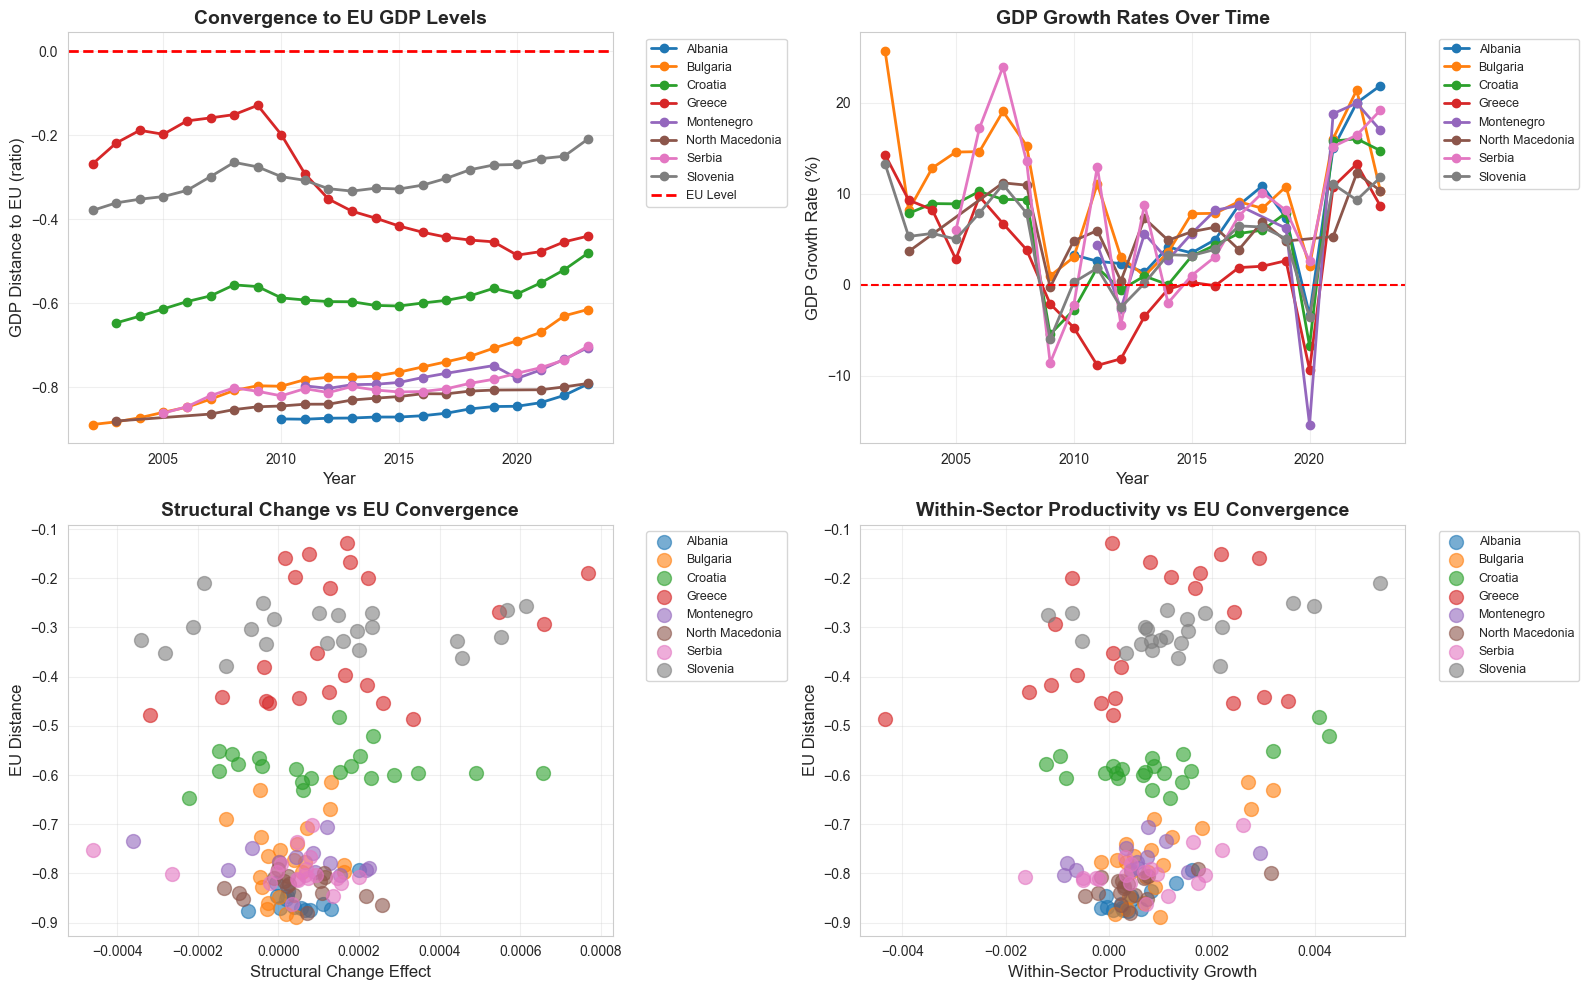

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

ax = axes[0, 0]
for country in df['COUNTRY'].unique():
    country_data = df[df['COUNTRY'] == country].sort_values('DATE')
    ax.plot(country_data['DATE'], country_data['EU_Distance'],
            marker='o', label=country, linewidth=2)
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='EU Level')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('GDP Distance to EU (ratio)', fontsize=12)
ax.set_title('Convergence to EU GDP Levels', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
for country in df['COUNTRY'].unique():
    country_data = df[df['COUNTRY'] == country].sort_values('DATE')
    ax.plot(country_data['DATE'], country_data['GDP_growth'] * 100,
            marker='o', label=country, linewidth=2)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('GDP Growth Rate (%)', fontsize=12)
ax.set_title('GDP Growth Rates Over Time', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.grid(True, alpha=0.3)

ax = axes[1, 0]
for country in df['COUNTRY'].unique():
    country_data = df[df['COUNTRY'] == country]
    ax.scatter(country_data['SC'], country_data['EU_Distance'],
               label=country, s=100, alpha=0.6)
ax.set_xlabel('Structural Change Effect', fontsize=12)
ax.set_ylabel('EU Distance', fontsize=12)
ax.set_title('Structural Change vs EU Convergence', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
for country in df['COUNTRY'].unique():
    country_data = df[df['COUNTRY'] == country]
    ax.scatter(country_data['Within_SP'], country_data['EU_Distance'],
               label=country, s=100, alpha=0.6)
ax.set_xlabel('Within-Sector Productivity Growth', fontsize=12)
ax.set_ylabel('EU Distance', fontsize=12)
ax.set_title('Within-Sector Productivity vs EU Convergence', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/notebook-3/convergence_overview.png', dpi=300, bbox_inches='tight')
plt.show()

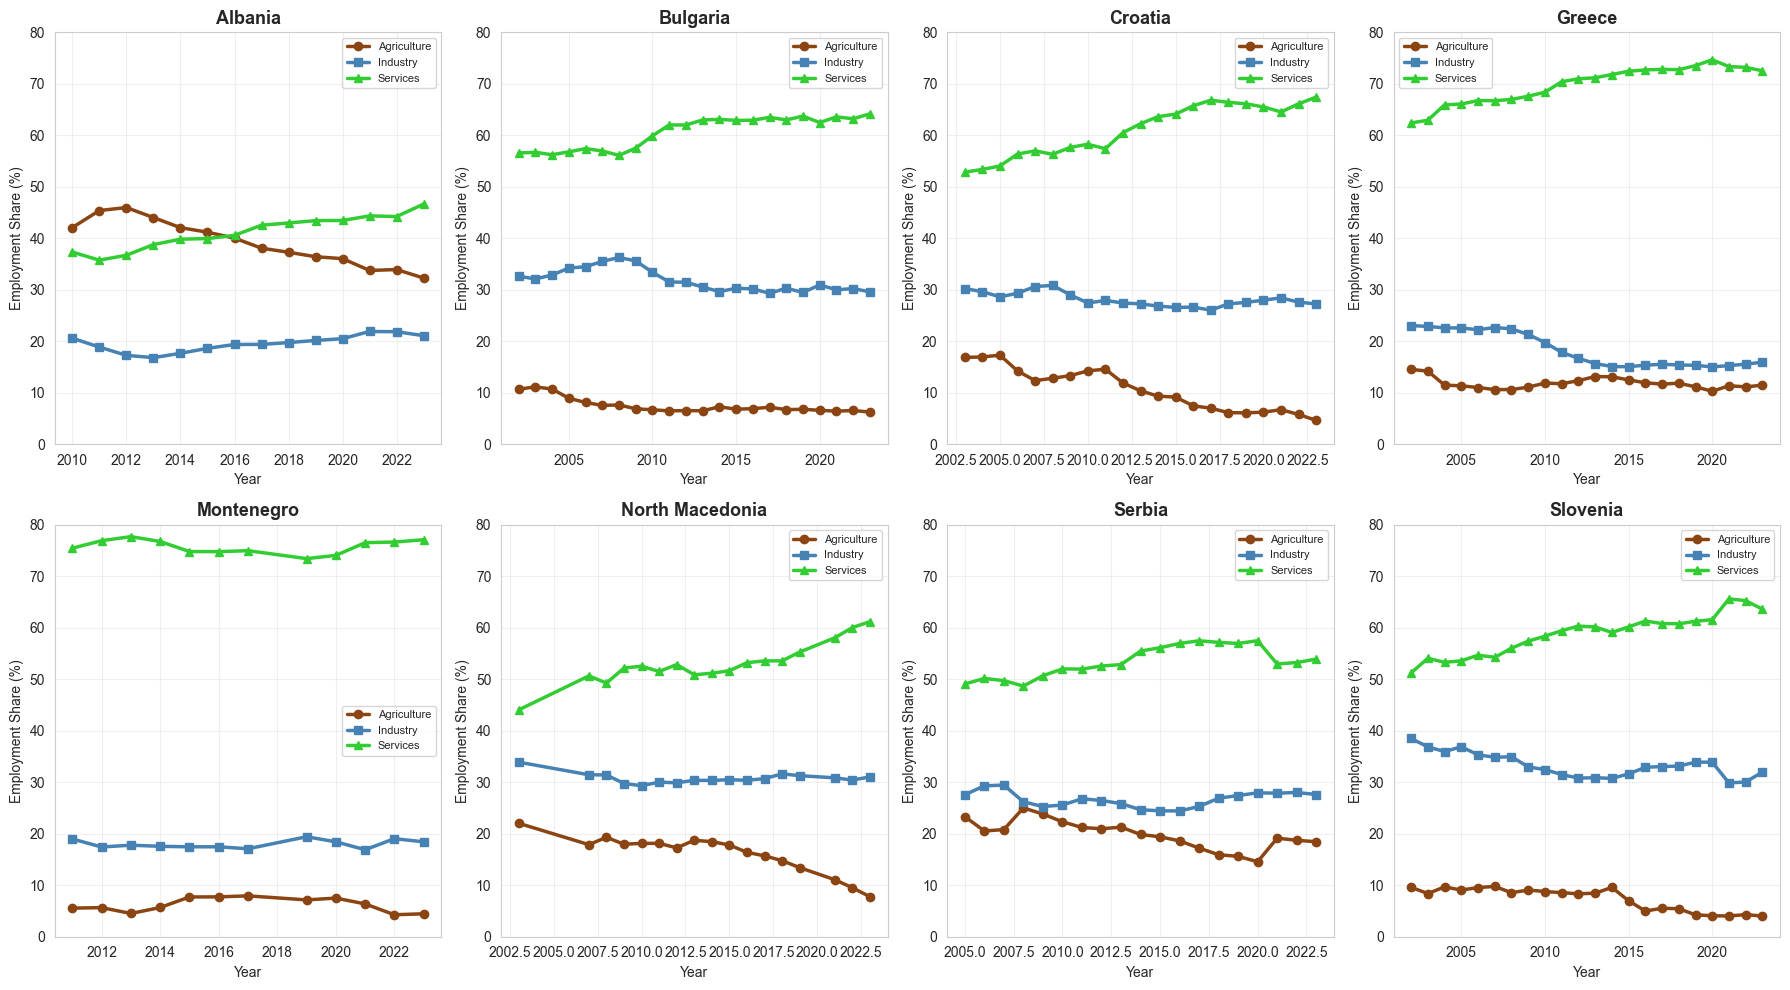

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

for idx, country in enumerate(sorted(df['COUNTRY'].unique())):
    ax = axes[idx // 4, idx % 4]
    country_data = df[df['COUNTRY'] == country].sort_values('DATE')

    ax.plot(country_data['DATE'], country_data['Share_Agriculture'] * 100,
            marker='o', label='Agriculture', linewidth=2.5, color='#8B4513')
    ax.plot(country_data['DATE'], country_data['Share_Industry'] * 100,
            marker='s', label='Industry', linewidth=2.5, color='#4682B4')
    ax.plot(country_data['DATE'], country_data['Share_Services'] * 100,
            marker='^', label='Services', linewidth=2.5, color='#32CD32')

    ax.set_title(country, fontsize=13, fontweight='bold')
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Employment Share (%)', fontsize=10)
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 80)

plt.tight_layout()
plt.savefig('../results/notebook-3/structural_transformation.png', dpi=300, bbox_inches='tight')
plt.show()

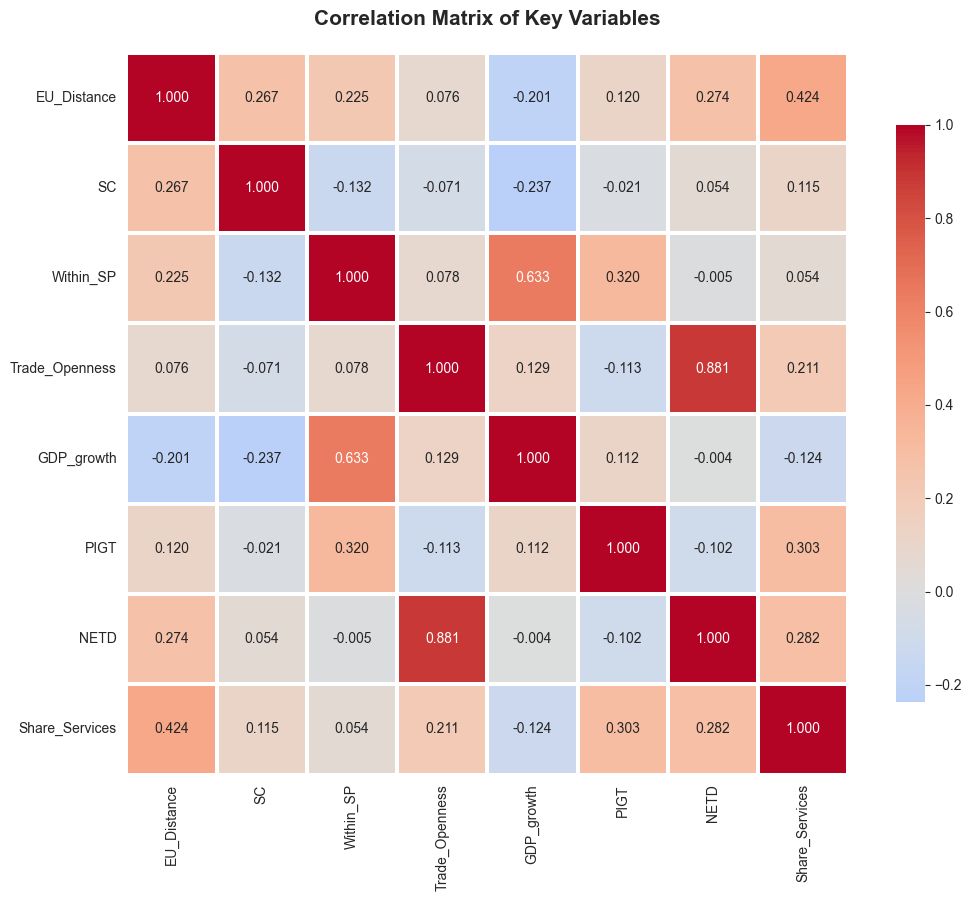

In [5]:
corr_vars = ['EU_Distance', 'SC', 'Within_SP', 'Trade_Openness', 'GDP_growth', 'PIGT', 'NETD', 'Share_Services']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(11, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1.5, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 10})
plt.title('Correlation Matrix of Key Variables', fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../results/notebook-3/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
print("DESCRIPTIVE STATISTICS BY COUNTRY")

stats_summary = []
for country in sorted(df['COUNTRY'].unique()):
    country_data = df[df['COUNTRY'] == country].sort_values('DATE')
    stats_summary.append({
        'Country': country,
        'N': len(country_data),
        'Avg EU Distance': f"{country_data['EU_Distance'].mean():.4f}",
        'Avg GDP Growth (%)': f"{country_data['GDP_growth'].mean() * 100:.2f}",
        'Avg SC Effect': f"{country_data['SC'].mean():.0f}",
        'Avg Within-SP': f"{country_data['Within_SP'].mean():.0f}",
        'Trade/GDP': f"{country_data['Trade_Openness'].mean():.2f}",
        'Services Share (Latest)': f"{country_data['Share_Services'].iloc[-1] * 100:.1f}%",
        'NETD (Latest, 000s)': f"{country_data['NETD'].iloc[-1]:.0f}"
    })

stats_df = pd.DataFrame(stats_summary)
print(stats_df.to_string(index=False))

stats_df.to_csv('../results/notebook-3/country_descriptive_stats.csv', index=False)

DESCRIPTIVE STATISTICS BY COUNTRY
        Country  N Avg EU Distance Avg GDP Growth (%) Avg SC Effect Avg Within-SP Trade/GDP Services Share (Latest) NETD (Latest, 000s)
        Albania 14         -0.8542               7.33             0             0      2.16                   46.6%                1308
       Bulgaria 22         -0.7718              10.30             0             0      8.20                   64.2%                3481
        Croatia 21         -0.5829               5.50             0             0      3.70                   67.4%                1703
         Greece 22         -0.3252               2.60             0             0      7.02                   72.5%                5044
     Montenegro 12         -0.7702               6.59             0             0      0.66                   77.1%                 270
North Macedonia 17         -0.8288               6.15             0             0      2.16                   61.2%                 743
         Serbi

/var/folders/1r/8qsv6l4d2xs9tv69xpg5sfqw0000gn/T/ipykernel_30479/1995293012.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([df[df['COUNTRY'] == c]['EU_Distance'].values for c in country_order],


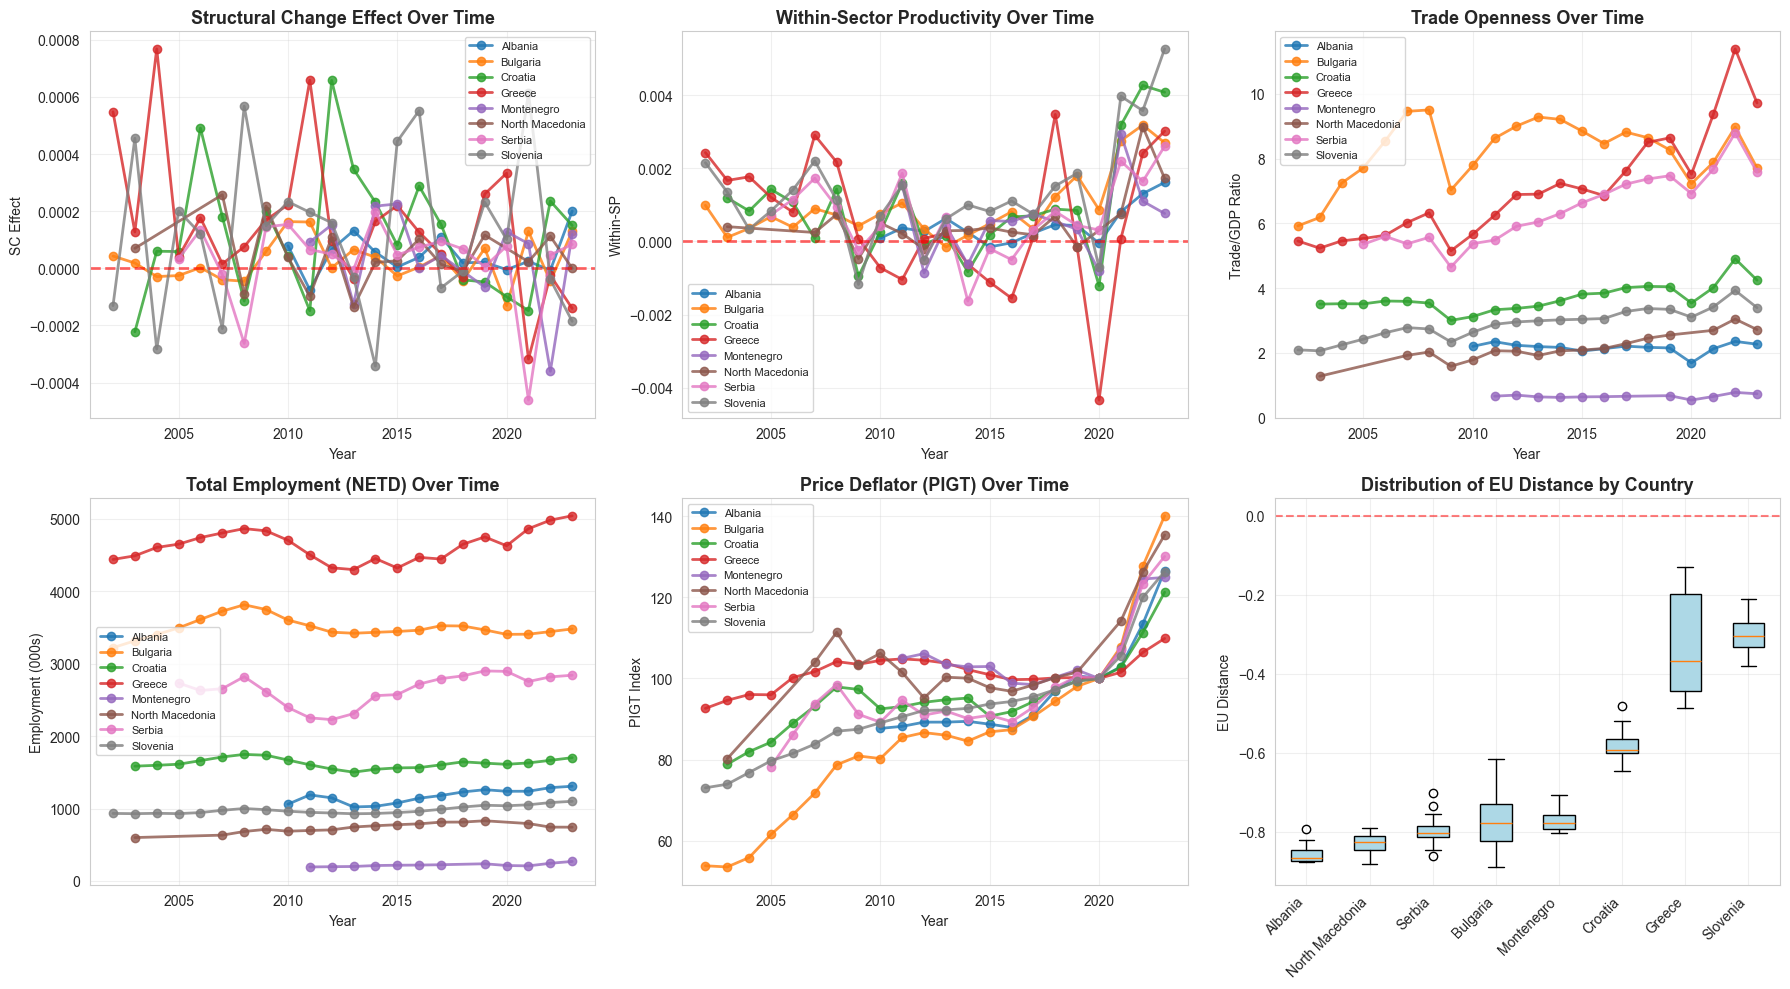

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ax = axes[0, 0]
for country in df['COUNTRY'].unique():
    country_data = df[df['COUNTRY'] == country].sort_values('DATE')
    ax.plot(country_data['DATE'], country_data['SC'],
            marker='o', label=country, linewidth=2, alpha=0.8)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.6, linewidth=2)
ax.set_title('Structural Change Effect Over Time', fontsize=13, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('SC Effect')
ax.legend(fontsize=8, loc='best')
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
for country in df['COUNTRY'].unique():
    country_data = df[df['COUNTRY'] == country].sort_values('DATE')
    ax.plot(country_data['DATE'], country_data['Within_SP'],
            marker='o', label=country, linewidth=2, alpha=0.8)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.6, linewidth=2)
ax.set_title('Within-Sector Productivity Over Time', fontsize=13, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Within-SP')
ax.legend(fontsize=8, loc='best')
ax.grid(True, alpha=0.3)

ax = axes[0, 2]
for country in df['COUNTRY'].unique():
    country_data = df[df['COUNTRY'] == country].sort_values('DATE')
    ax.plot(country_data['DATE'], country_data['Trade_Openness'],
            marker='o', label=country, linewidth=2, alpha=0.8)
ax.set_title('Trade Openness Over Time', fontsize=13, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Trade/GDP Ratio')
ax.legend(fontsize=8, loc='best')
ax.grid(True, alpha=0.3)

ax = axes[1, 0]
for country in df['COUNTRY'].unique():
    country_data = df[df['COUNTRY'] == country].sort_values('DATE')
    ax.plot(country_data['DATE'], country_data['NETD'],
            marker='o', label=country, linewidth=2, alpha=0.8)
ax.set_title('Total Employment (NETD) Over Time', fontsize=13, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Employment (000s)')
ax.legend(fontsize=8, loc='best')
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
for country in df['COUNTRY'].unique():
    country_data = df[df['COUNTRY'] == country].sort_values('DATE')
    ax.plot(country_data['DATE'], country_data['PIGT'],
            marker='o', label=country, linewidth=2, alpha=0.8)
ax.set_title('Price Deflator (PIGT) Over Time', fontsize=13, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('PIGT Index')
ax.legend(fontsize=8, loc='best')
ax.grid(True, alpha=0.3)

ax = axes[1, 2]
country_order = df.groupby('COUNTRY')['EU_Distance'].mean().sort_values().index
bp = ax.boxplot([df[df['COUNTRY'] == c]['EU_Distance'].values for c in country_order],
                labels=country_order, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
ax.set_title('Distribution of EU Distance by Country', fontsize=13, fontweight='bold')
ax.set_ylabel('EU Distance')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/notebook-3/time_trends.png', dpi=300, bbox_inches='tight')
plt.show()

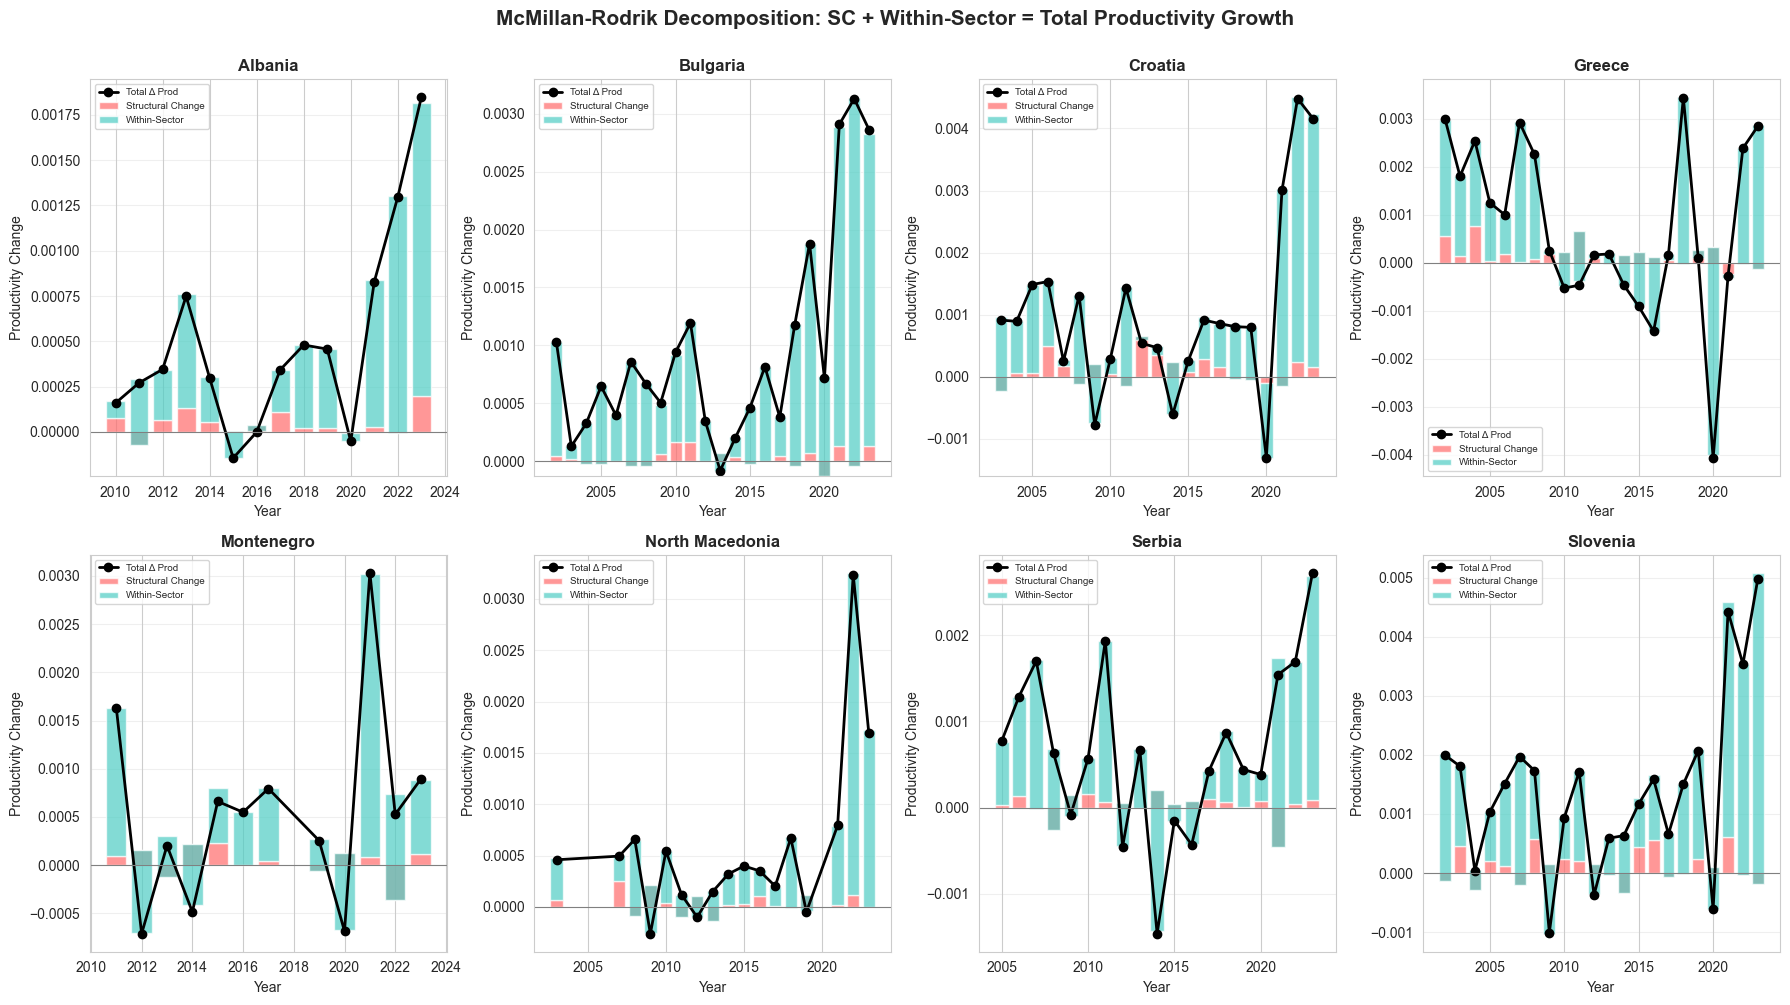

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

for idx, country in enumerate(sorted(df['COUNTRY'].unique())):
    ax = axes[idx // 4, idx % 4]
    country_data = df[df['COUNTRY'] == country].sort_values('DATE')

    years = country_data['DATE']
    ax.bar(years, country_data['SC'], alpha=0.7, label='Structural Change', color='#FF6B6B')
    ax.bar(years, country_data['Within_SP'], bottom=country_data['SC'],
           alpha=0.7, label='Within-Sector', color='#4ECDC4')
    ax.plot(years, country_data['dTotal_Prod'], marker='o', color='black',
            linewidth=2, label='Total Δ Prod', markersize=6)

    ax.set_title(country, fontsize=12, fontweight='bold')
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Productivity Change', fontsize=10)
    ax.legend(fontsize=7, loc='best')
    ax.grid(True, alpha=0.3, axis='y')
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8)

plt.suptitle('McMillan-Rodrik Decomposition: SC + Within-Sector = Total Productivity Growth',
             fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../results/notebook-3/productivity_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()